In [581]:
# Import libraries
import folium

import math
import numpy as np
import pandas as pd

from datetime import datetime
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [582]:
pd_08 = pd.read_csv("./data/2019-08.csv")
pd_09 = pd.read_csv("./data/2019-09.csv")
pd_10 = pd.read_csv("./data/2019-10.csv")
pd_stations = pd.read_csv("./data/stations.csv")
pd_stations = pd_stations.set_index('id')


# discard any station with an id bigger than the largest one from the station list.
largest_station_id = pd_stations.shape[0]
print(largest_station_id)
pd_08 = pd_08[pd_08['Ciclo_Estacion_Retiro'] <= largest_station_id]
pd_09 = pd_09[pd_09['Ciclo_Estacion_Retiro'] <= largest_station_id]
pd_10 = pd_10[pd_10['Ciclo_Estacion_Retiro'] <= largest_station_id]

pd_08 = pd_08[pd_08['Ciclo_Estacion_Arribo'] <= largest_station_id]
pd_09 = pd_09[pd_09['Ciclo_Estacion_Arribo'] <= largest_station_id]
pd_10 = pd_10[pd_10['Ciclo_Estacion_Arribo'] <= largest_station_id]

print("Shape 08:", pd_08.shape)
print("Shape 09:", pd_09.shape)
print("Shape 10:", pd_10.shape)
print("Shape 10:", pd_stations.shape)


/Users/kawer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


480
Shape 08: (748635, 9)
Shape 09: (673743, 9)
Shape 10: (740912, 9)
Shape 10: (480, 3)


In [583]:
print(pd_08.tail())
print()
print("STATIONS")
print(pd_stations.tail())


       Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro  \
748700              F            56   9039                     69   
748701              M            29   2161                    149   
748702              M            32  11285                    129   
748703              M            28   9420                    421   
748704              F            30  11799                    135   

       Fecha_Retiro Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo  \
748700   30/08/2019    23:58:47                     59   31/08/2019   
748701   30/08/2019    23:58:49                    254   31/08/2019   
748702   30/08/2019    23:59:11                    133   31/08/2019   
748703   30/08/2019    23:59:47                    420   31/08/2019   
748704   30/08/2019    23:59:56                    134   31/08/2019   

       Hora_Arribo  
748700     0:03:24  
748701     0:15:41  
748702     0:04:35  
748703     0:01:21  
748704     0:03:41  

STATIONS
           lat        

# ¿Cómo se comporta el arribo de viajes por horas del día y por estaciones?
## ¿Cual es la hora ‘pico’ del servicio?
## ¿Cuál es la estación con más viajes? ¿y la que tiene menos viajes?



In [586]:
def rush_hour(rent_times, plot_graph=True):
    """ Find the rush hour. Rush hour is defined as the hour of the day where more bikes were rented.
    Inputs:
        rent_times: list of times
    Outputs:
        rush_hour: int between 0 - 24
    """
    hours = [datetime.strptime(time, "%H:%M:%S").hour for time in rent_times]
    # most_common
    mc = Counter(hours).most_common()
    ans = mc[0][0]
    if plot_graph:
        x, y = zip(*mc)

        plt.bar(x, y)
        plt.xlabel('Hora del día')
        plt.ylabel('Cantidad de viajes')
        plt.show()
    return mc[0][0]

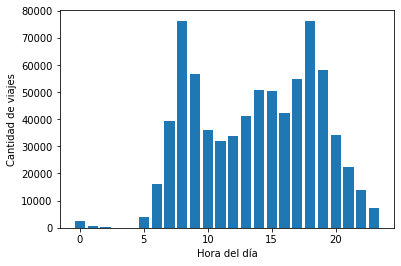

08/2019: 8


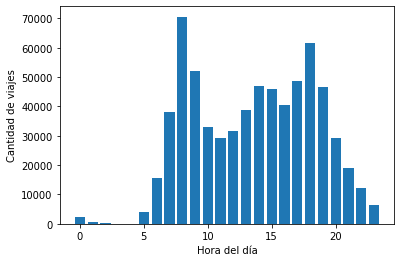

09/2019: 8


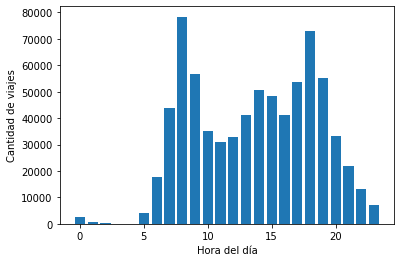

10/2019: 8


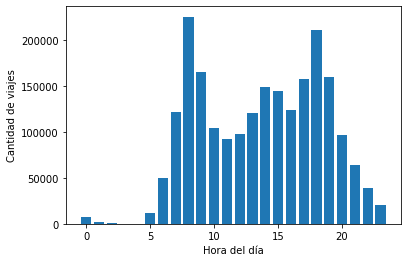

Todos los meses: 8


In [587]:
hours = np.hstack((pd_08['Hora_Retiro'], pd_09['Hora_Retiro'], pd_10['Hora_Retiro']))
print('08/2019:',rush_hour(pd_08['Hora_Retiro']))
print('09/2019:',rush_hour(pd_09['Hora_Retiro']))
print('10/2019:',rush_hour(pd_10['Hora_Retiro']))
print('Todos los meses:',rush_hour(hours))

## La hora pico de retiros en todos los meses fue las 8am.
## Las 6pm siempre fue la segunda hora con más retiros de bicicletas.

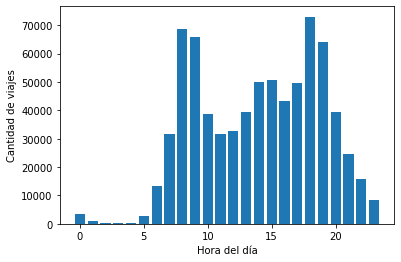

08/2019: 18


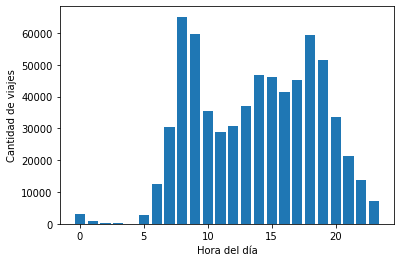

09/2019: 8


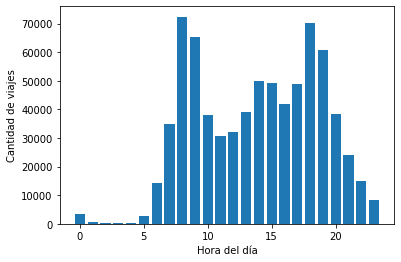

10/2019: 8


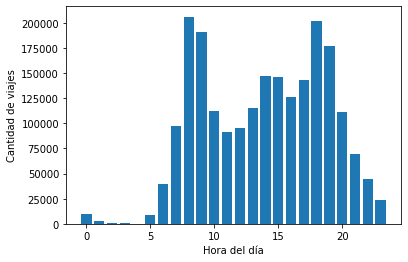

Todos los meses: 8


In [588]:
hours = np.hstack((pd_08['Hora_Arribo'], pd_09['Hora_Arribo'], pd_10['Hora_Arribo']))
print('08/2019:',rush_hour(pd_08['Hora_Arribo']))
print('09/2019:',rush_hour(pd_09['Hora_Arribo']))
print('10/2019:',rush_hour(pd_10['Hora_Arribo']))
print('Todos los meses:',rush_hour(hours))

## La hora pico de arribos en el mes 08 fue las 18 (6pm).
## En tanto el mes 09 y 10, como en todos los meses juntos, fue las 8am

## Juntando los resultados de las 'horas pico' tanto de retiros como arribos, podemos ver que la mayoría de los viajes comienzan a las 8 de la mañana y tienden a ser cortos porque terminan dentro del mismo horario <br /><br />

## ¿Cuál es la estación con más viajes? ¿y la que tiene menos viajes?

In [589]:
def check_tie(counter):
    """ Find out if there is a tie.
    Inputs:
        counter: Counter of stations.
    Outputs:
        most_trips: station with most trips. If tied, it will return a list with all stations.
        least_trips: station with least trips. If tied, it will return a list with all stations.
    """
    mc = counter.most_common()
    top_station = mc[0][1]
    ts = []
    # check for most common tie
    for element in mc:
        if element[1] == top_station:
            ts.append(element)
        else:
            break
            
    combined_most_list = []       
    for element in ts:
        top_dict = {
                    "Station ID": element[0],
                    "Station Name": (pd_stations.loc[mc[0][0]]['name']),
                    "Number of Rentals": element[1]
                   }
        combined_most_list.append(top_dict)
            
            
    # least common
    least_station = mc[-1][1]
    ls = []
    # check for least common tie
    for element in reversed(mc):
        if element[1] == least_station:
            ls.append(element)
            break
            
    combined_least_list = []       
    for element in ls:
        top_dict = {
                    "Station ID": element[0],
                    "Station Name": (pd_stations.loc[element[0]]['name']),
                    "Number of Rentals": element[1]
                   }
        combined_least_list.append(top_dict)

            
    return (combined_most_list,combined_least_list)

def station_trips(stations, pd_stations, check_ties=False):
    """ Find the stations with most and least rentals.
    Inputs:
        stations:      list of stations where rental was made.
        station_names: data frame containing information about each station.
        check_ties:    boolean that decides if function looks for ties.
    Outputs:
        most_trips:  tuple containing station with most rentals and number of rentals. 
                     If check_ties parameter is True, it will return a list with all stations,
                     or a list with a single one if no ties found.
        least_trips: tuple containing station with least rentals and number of rentals.
                     If check_ties parameter is True, it will return a list with all stations,
                     or a list with a single one if no ties found.
    """
    counter = Counter(stations)
    if check_ties:
        return check_tie(counter)
    else:
        mc = counter.most_common()
        # most_common
        top_dict = {
                    "Station ID": mc[0][0],
                    "Station Name": (pd_stations.loc[mc[0][0]]['name']),
                    "Number of Rentals": mc[0][1]
                   }
            
        # least common

        # discard any station with an id bigger than the largest one from the station list.
        # these ids were probably recorded incorrecctly

        least_dict = {
                    "Station ID": mc[-1][0],
                    "Station Name": (pd_stations.loc[mc[-1][0]]['name']),
                    "Number of Rentals": mc[-1][1]
                   }
        return (top_dict,least_dict)

In [590]:
top, least = station_trips(pd_08['Ciclo_Estacion_Retiro'], pd_stations)
print("08-2019: ")
print("top: ", top)
print("least: ", least)
print()

top, least = station_trips(pd_09['Ciclo_Estacion_Retiro'], pd_stations)
print("09-2019: ")
print("top: ", top)
print("least: ", least)
print()

top, least = station_trips(pd_10['Ciclo_Estacion_Retiro'], pd_stations)
print("10-2019: ")
print("top: ", top)
print("least: ", least)
print()

all_rentals = np.hstack((pd_08['Ciclo_Estacion_Retiro'],
                         pd_09['Ciclo_Estacion_Retiro'],
                         pd_10['Ciclo_Estacion_Retiro']))
top, least = station_trips(all_rentals, pd_stations)
print("08-2019 -- 10-2019: ")
print("top: ", top)
print("least: ", least)

08-2019: 
top:  {'Station ID': 271, 'Station Name': '271 AV. CENTRAL-J. MENESES ', 'Number of Rentals': 8100}
least:  {'Station ID': 113, 'Station Name': '113 GENERAL PRIM-VERSALLES', 'Number of Rentals': 11}

09-2019: 
top:  {'Station ID': 271, 'Station Name': '271 AV. CENTRAL-J. MENESES ', 'Number of Rentals': 6901}
least:  {'Station ID': 410, 'Station Name': '410 PROLONGACIÓN TAJÍN-PROLONGACIÓN REPÚBLICAS', 'Number of Rentals': 88}

10-2019: 
top:  {'Station ID': 271, 'Station Name': '271 AV. CENTRAL-J. MENESES ', 'Number of Rentals': 7218}
least:  {'Station ID': 404, 'Station Name': '404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE', 'Number of Rentals': 84}

08-2019 -- 10-2019: 
top:  {'Station ID': 271, 'Station Name': '271 AV. CENTRAL-J. MENESES ', 'Number of Rentals': 22219}
least:  {'Station ID': 113, 'Station Name': '113 GENERAL PRIM-VERSALLES', 'Number of Rentals': 11}


### Dado que en ninguno de los meses existen empaten de estaciones con más o menos retiros, se vuelve innecesario revisar que existan repetidos. Por esto se utilza False como parámetro del check_ties.

### La estación con más retiros siempre fue: 
#### 271 AV. CENTRAL-J. MENESES con 22219 retiros en el periodo 08/2019-10/2019

### La estación con menos retiros cambió de mes a mes:
#### En el mes 08 fue: 113 GENERAL PRIM-VERSALLES con 11 retiros
#### En el mes 09 fue: 410 PROLONGACIÓN TAJÍN-PROLONGACIÓN REPÚBLICAS con 8 retiros
#### En el mes 10 fue: 404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE con 84 retiros
#### Sumando los viajes de todos los meses fue: 113 GENERAL PRIM-VERSALLES con 11 viajes en total

### Un dato interesante es que la estación con menos retiros del primer mes parece no haber tenido ningun tipo de retiro en los siguientes meses. Esto puede ser por algun tipo de error en la recolección de datos o un cambio en el id de la estación. Como se explicará luego en la exploración, existen errores con la recolección y limpieza de los datos

### Algo a notar, es que en las listas de rentas, habían errores, ya que aparecían estaciones con códigos más arriba de 481, que es el id de mayor magnitud de la lista de estaciones. Tomando esto en cuenta había que hacer caso omiso a estaciones que no existen dentro de la lista.

In [591]:
top, least = station_trips(pd_08['Ciclo_Estacion_Arribo'], pd_stations)
print("08-2019: ")
print("top arrivals: ", top)
print("least arrivals: ", least)
print()

top, least = station_trips(pd_09['Ciclo_Estacion_Arribo'], pd_stations)
print("09-2019: ")
print("top arrivals: ", top)
print("least arrivals: ", least)
print()

top, least = station_trips(pd_10['Ciclo_Estacion_Arribo'], pd_stations)
print("10-2019: ")
print("top arrivals: ", top)
print("least arrivals: ", least)
print()

all_rentals = np.hstack((pd_08['Ciclo_Estacion_Arribo'],
                         pd_09['Ciclo_Estacion_Arribo'],
                         pd_10['Ciclo_Estacion_Arribo']))
top, least = station_trips(all_rentals, pd_stations)
print("08-2019 -- 10-2019: ")
print("top arrivals: ", top)
print("least arrivals: ", least)

08-2019: 
top arrivals:  {'Station ID': 266, 'Station Name': '266 AV. JESÚS GARCIA-CARLOS J. MENESES ', 'Number of Rentals': 8845}
least arrivals:  {'Station ID': 113, 'Station Name': '113 GENERAL PRIM-VERSALLES', 'Number of Rentals': 28}

09-2019: 
top arrivals:  {'Station ID': 266, 'Station Name': '266 AV. JESÚS GARCIA-CARLOS J. MENESES ', 'Number of Rentals': 7616}
least arrivals:  {'Station ID': 411, 'Station Name': '411 PARROQUIA-AVENIDA MÉXICO-COYOACAN', 'Number of Rentals': 98}

10-2019: 
top arrivals:  {'Station ID': 266, 'Station Name': '266 AV. JESÚS GARCIA-CARLOS J. MENESES ', 'Number of Rentals': 8496}
least arrivals:  {'Station ID': 404, 'Station Name': '404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE', 'Number of Rentals': 88}

08-2019 -- 10-2019: 
top arrivals:  {'Station ID': 266, 'Station Name': '266 AV. JESÚS GARCIA-CARLOS J. MENESES ', 'Number of Rentals': 24957}
least arrivals:  {'Station ID': 113, 'Station Name': '113 GENERAL PRIM-VERSALLES', 'Number of Rentals': 28}

### Dado que en ninguno de los meses existen empaten de estaciones con más o menos arribos, se vuelve innecesario revisar que existan repetidos. Por esto se utilza False como parámetro del check_ties.

### La estación con más arribos siempre fue: 
#### 266 AV. JESÚS GARCIA-CARLOS J. MENESES con 24957 arribos en el periodo 08/2019-20/2019

### La estación con menos retiros cambió de mes a mes:
#### En el mes 08 fue: 113 GENERAL PRIM-VERSALLES con 28 arribos
#### En el mes 09 fue: 411 PARROQUIA-AVENIDA MÉXICO-COYOACAN con 98 arribos
#### En el mes 10 fue: 404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE con 88 arribos
#### Sumando los viajes de todos los meses fue: 113 GENERAL PRIM-VERSALLES con 28 arribos

### Como en la lista anterior, la estación con menos arribos del primer mes parece no haber tenido ningun tipo de arribos en los siguientes meses. Esto puede ser por algun tipo de error en la recolección de datos o un cambio en el id de la estación. Como se explicará luego en la exploración, existen errores con la recolección y limpieza de los datos

### Algo a notar, es que en las listas de arribos, al igual que en al de retiros, habían errores, ya que aparecían estaciones con códigos más arriba de 481, que es el id de mayor magnitud de la lista de estaciones. Tomando esto en cuenta había que hacer caso omiso a estaciones que no existen dentro de la lista.


In [352]:
all_withdrawals = np.hstack((pd_08['Ciclo_Estacion_Retiro'],
                             pd_09['Ciclo_Estacion_Retiro'],
                             pd_10['Ciclo_Estacion_Retiro']))

all_arrivals = np.hstack((pd_08['Ciclo_Estacion_Arribo'],
                          pd_09['Ciclo_Estacion_Arribo'],
                          pd_10['Ciclo_Estacion_Arribo']))

all_rentals = np.hstack((all_withdrawals, all_arrivals))
top, least = station_trips(all_rentals, pd_stations)
print("08-2019 -- 10-2019: ")
print("top rentals: ", top)
print("least rentals: ", least)

08-2019 -- 10-2019: 
top rentals:  {'Station ID': 266, 'Station Name': '266 AV. JESÚS GARCIA-CARLOS J. MENESES ', 'Number of Rentals': 39834}
least rentals:  {'Station ID': 113, 'Station Name': '113 GENERAL PRIM-VERSALLES', 'Number of Rentals': 39}


### Si juntamos la colunma de retiros con la de arribos para conseguir todas las estaciones donde los clientes asistieron, nos damos cuenta que en términos generales, la estación con la mayor demanda es 266 AV. JESÚS GARCIA-CARLOS J. MENESES. Esta fue también la estación con mas arribos. Dicha estación tuvo 39834 interacciones con ususarios (retiros + arribos).

### La estación con menos interacción es 113 GENERAL PRIM-VERSALLES, que fue tanto la estación con menos retiros y arribos, por lo que era esperar que fuera la menor con esta medida global. Dicha estación tuvo 39 interacciones cn usuarios (retiros + arribos) <br />

# Tendencia de estaciones. Considerando los viajes de los tres meses ¿qué estaciones han incrementado más su demanda (un top 3 es suficiente) y cuales han descendido en demanda (top 3)?


In [592]:
def demand_changes_overall(stations_rentals_per_month, pd_stations, output_graphs=False, num_stations=3):
    ''' Finds the 3 largest increases and decreases in demand for specific stores.
    Inputs:
            stations_rentals_per_month: list containing all three dataframes of stations where rentals were made.
            pd_stations:                data frame containing information about each station.
            output_graphs:              boolean that states if user wants graphs to be printed out
            num_stations:               int determining how many top stations the user wants outputted.
                                        Must be <= len(most_common of the counter), given that that is the total
                                        number of stations present in the dictionary. In other words, only those
                                        stations had trips, if a bigger number is used, one would receive 
                                        index_out_of_range error.
    
    Outputs:
            largest_increase_list:  list containing a dictionaries for each of the top 3 stations that had the 
                                    largest increase in demand. Dictionary includes station id, station name,
                                    and change in rentals, which represents the difference between rental of the
                                    first and last months
            largest_decrease_list:  list containing a dictionaries for each of the top 3 stations that had the 
                                    largest decrease in demand. Dictionary includes station id, station name,
                                    and change in rentals, which represents the difference between rental of the
                                    first and last months
                                    
            Additionally, outputs graphs showing the difference in demand for the stations in each of the lists
    '''
    
    mc_08 = Counter(stations_rentals_per_month[0])
    mc_09 = Counter(stations_rentals_per_month[1])
    mc_10 = Counter(stations_rentals_per_month[2])
    
    mc_diff = mc_10.copy()
    mc_diff.subtract(mc_08)
    difference = mc_diff.most_common()
    
    assert num_stations <= len(difference)
    
    best_ys = []
    largest_increase_list = []
    for i in range(num_stations):
        largest_increase_dict = {
            "Station ID": difference[i][0],
            "Station Name": (pd_stations.loc[difference[i][0]]['name']),
            "Change in rentals": difference[i][1]
        }
        largest_increase_list.append(largest_increase_dict)
        
        best_ys.append([mc_08[difference[i][0]], mc_09[difference[i][0]], mc_10[difference[i][0]]])
    
    worst_ys = []
    largest_decrease_list = []
    for i in range(1,num_stations+1):
        largest_derease_dict = {
            "Station ID": difference[-i][0],
            "Station Name": (pd_stations.loc[difference[-i][0]]['name']),
            "Change in rentals": difference[-i][1]
        }
        largest_decrease_list.append(largest_derease_dict)
        worst_ys.append([mc_08[difference[-i][0]], mc_09[difference[-i][0]], mc_10[difference[-i][0]]])
     
    if output_graphs:
        x = ['08/2019','09/2019','10/2019']

        y_best = best_ys[0]
        y_2nd_best = best_ys[1]
        y_3rd_best = best_ys[2]

        y_worst = worst_ys[0]
        y_2nd_worst = worst_ys[1]
        y_3rd_worst = worst_ys[2]


        plt.plot(x, y_best, label='highest increase')
        plt.plot(x, y_2nd_best, label='second highest increase')
        plt.plot(x, y_3rd_best, label='third highest increase')
        plt.legend()
        plt.title('Change in demand per month')
        plt.show()

        plt.plot(x, y_worst, label='highest decrease')
        plt.plot(x, y_2nd_worst, label='second highest decrease')
        plt.plot(x, y_3rd_worst, label='third highest decrease')
        plt.legend()
        plt.title('Change in demand per month')
        plt.show()
    
    return largest_increase_list, largest_decrease_list

In [593]:
def demand_changes_monthly(stations_rentals_per_month, pd_stations, dates, output_graphs=False):
    ''' Finds the 3 largest increases and decreases in demand for specific stores for two specific months.
    Inputs:
            stations_rentals_per_month: list containing all three dataframes of stations where rentals were made.
            pd_stations:                data frame containing information about each station.
            dates
            output_graphs:               boolean that states if user wants graphs to be printed out
    
    Outputs:
            largest_increase_list:  list containing a dictionaries for each of the top 3 stations that had the 
                                    largest increase in demand. Dictionary includes station id, station name,
                                    and change in rentals, which represents the difference between rental of the
                                    first and last months
            largest_decrease_list:  list containing a dictionaries for each of the top 3 stations that had the 
                                    largest decrease in demand. Dictionary includes station id, station name,
                                    and change in rentals, which represents the difference between rental of the
                                    first and last months
                                    
            Additionally, outputs graphs showing the difference in demand for the stations in each of the lists
    '''
    month_1 = Counter(stations_rentals_per_month[0])
    month_2 = Counter(stations_rentals_per_month[1])

    mc_diff = month_2.copy()
    mc_diff.subtract(month_1)
    difference = mc_diff.most_common()
    
    best_ys = []
    largest_increase_list = []
    for i in range(3):
        largest_increase_dict = {
            "Station ID": difference[i][0],
            "Station Name": (pd_stations.loc[difference[i][0]]['name']),
            "Change in rentals": difference[i][1]
        }
        largest_increase_list.append(largest_increase_dict)
        
        best_ys.append([month_1[difference[i][0]], month_2[difference[i][0]]])
    
    worst_ys = []
    largest_decrease_list = []
    for i in range(1,4):
        largest_derease_dict = {
            "Station ID": difference[-i][0],
            "Station Name": (pd_stations.loc[difference[-i][0]]['name']),
            "Change in rentals": difference[-i][1]
        }
        largest_decrease_list.append(largest_derease_dict)
        worst_ys.append([month_1[difference[-i][0]], month_2[difference[-i][0]]])
    
    if output_graphs:
        x = [dates[0], dates[1]]

        y_best = best_ys[0]
        y_2nd_best = best_ys[1]
        y_3rd_best = best_ys[2]

        y_worst = worst_ys[0]
        y_2nd_worst = worst_ys[1]
        y_3rd_worst = worst_ys[2]


        plt.plot(x, y_best, label='highest increase')
        plt.plot(x, y_2nd_best, label='second highest increase')
        plt.plot(x, y_3rd_best, label='third highest increase')
        plt.title('Change in demand per month')
        plt.legend()
        plt.show()

        plt.plot(x, y_worst, label='highest decrease')
        plt.plot(x, y_2nd_worst, label='second highest decrease')
        plt.plot(x, y_3rd_worst, label='third highest decrease')
        plt.title('Change in demand per month')
        plt.legend()
        plt.show()
    
    return largest_increase_list, largest_decrease_list

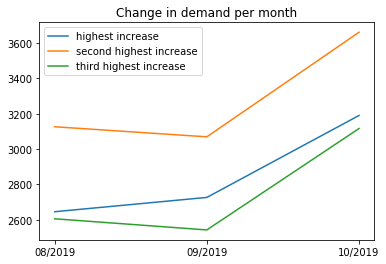

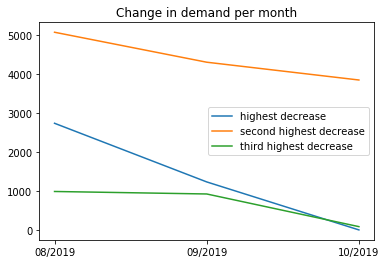

Mayor aumento en retirtos en el periodo de tiempo completo [{'Station ID': 29, 'Station Name': '29 REFORMA-BUCARELI', 'Change in rentals': 545}, {'Station ID': 16, 'Station Name': '16 REFORMA-RÍO TIBER', 'Change in rentals': 535}, {'Station ID': 242, 'Station Name': '242 MIGUEL DE CERVANTES SAAVEDRA-PROL MOLIERE ', 'Change in rentals': 511}]
Mayor disminución en retirtos en el periodo de tiempo completo [{'Station ID': 17, 'Station Name': '17 REFORMA-RIO TIBER', 'Change in rentals': -2733}, {'Station ID': 41, 'Station Name': '41 REFORMA-AV. DE LA REPUBLICA', 'Change in rentals': -1224}, {'Station ID': 404, 'Station Name': '404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE', 'Change in rentals': -901}]

Mayor aumento en retirtos en el periodo 08/09 [{'Station ID': 259, 'Station Name': '259 TÓMAS ALVA EDISON-PONCIANO ARRIAGA ', 'Change in rentals': 133}, {'Station ID': 200, 'Station Name': '200 EMERSON-AV. EJERCITO NACIONAL', 'Change in rentals': 107}, {'Station ID': 139, 'Station Name': 'E1

In [594]:
all_station_rentals = [pd_08['Ciclo_Estacion_Retiro'],
                       pd_09['Ciclo_Estacion_Retiro'],
                       pd_10['Ciclo_Estacion_Retiro']]

largest_increases_overall, largest_decreases_overall = demand_changes_overall(
    all_station_rentals, pd_stations, True)
print('Mayor aumento en retirtos en el periodo de tiempo completo',largest_increases_overall)
print('Mayor disminución en retirtos en el periodo de tiempo completo',largest_decreases_overall)
print()

dates = ['08/2019', '09/2019', '10/2019']
station_rentals_08_to_09 = [all_station_rentals[0], all_station_rentals[1]]
largest_increases_08_09, largest_decreases_08_09 = demand_changes_monthly(
    station_rentals_08_to_09, pd_stations, [dates[0], dates[1]])
print('Mayor aumento en retirtos en el periodo 08/09',largest_increases_08_09)
print('Mayor disminución en retirtos en el periodo de tiempo completo',largest_decreases_08_09)
print()

station_rentals_09_to_10 = [all_station_rentals[1], all_station_rentals[2]]
largest_increases_09_to_10, largest_decreases_09_to_10 = demand_changes_monthly(
    station_rentals_09_to_10, pd_stations, [dates[1], dates[2]])
print('Mayor aumento en retirtos en el periodo 09/10',largest_increases_09_to_10)
print('Mayor disminución en retirtos en el periodo de tiempo completo',largest_decreases_09_to_10)

### Las 3 estaciones que tuvieron el mayor incremento en la demanda de retiros fueron:
#### 29 REFORMA-BUCARELI, con un incremento de 545
#### 16 REFORMA-RÍO TIBER, con un incremento de 535
#### 242 MIGUEL DE CERVANTES SAAVEDRA-PROL MOLIERE con un incremento de 511

### Las 3 estaciones que tuvieron el mayor disminución en la demanda de retiros fueron:
#### 17 REFORMA-RIO TIBER, con una disminución de 2733
#### 41 REFORMA-AV. DE LA REPUBLICA, con una disminución de 1224
#### 404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE con una disminución de 901

### Cabe recalcar que algunas de las disminuciones en la cantidad de retiros se dan porque existen errores en los datos. Existen estaciones con el mismo nombre, que se diferencian por una tilde y estos tienen un distinto id, por lo que se toman como estaciones distintas. 

### Un ejemplo es "*REFORMA-RÍO TIBER*", id 16, que su versión con tilde aparece como segunda en aumento de retiros y "*REFORMA-RIO TIBER*", id 17, aparece primera en disminución mayor en los retiros. Esto quiere decir, que durante el primer mes los viajes se estaban marcando como empezando en la estación sin tilde y después del primer mes se utilizó la versión con tilde. Al crearse la lista de estaciones, que seguramente fue creada basándose en los datos de los viajes, se crearon diferentes id y nombres de tiendas para sucursales que son la misma, solo que utilizada en diferentes momentos. 

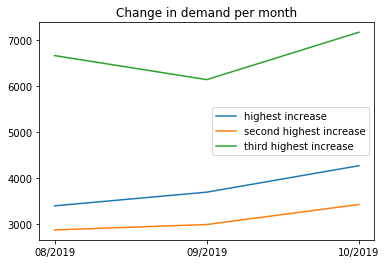

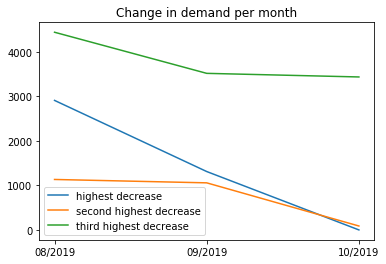

Mayor aumento en arribos en el periodo de tiempo completo [{'Station ID': 16, 'Station Name': '16 REFORMA-RÍO TIBER', 'Change in rentals': 870}, {'Station ID': 29, 'Station Name': '29 REFORMA-BUCARELI', 'Change in rentals': 552}, {'Station ID': 27, 'Station Name': '27 REFORMA-HAVRE', 'Change in rentals': 506}]
Mayor disminución en arribos en el periodo de tiempo completo [{'Station ID': 17, 'Station Name': '17 REFORMA-RIO TIBER', 'Change in rentals': -2911}, {'Station ID': 404, 'Station Name': '404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE', 'Change in rentals': -1046}, {'Station ID': 41, 'Station Name': '41 REFORMA-AV. DE LA REPUBLICA', 'Change in rentals': -1005}]

Mayor aumento en arribos en el periodo 08/09 [{'Station ID': 16, 'Station Name': '16 REFORMA-RÍO TIBER', 'Change in rentals': 296}, {'Station ID': 209, 'Station Name': '209 SOLON-HORACIO ', 'Change in rentals': 133}, {'Station ID': 217, 'Station Name': '217 EULER-AV. HORACIO ', 'Change in rentals': 132}]
Mayor disminución 

In [595]:
all_station_rentals = [pd_08['Ciclo_Estacion_Arribo'],
                       pd_09['Ciclo_Estacion_Arribo'],
                       pd_10['Ciclo_Estacion_Arribo']]

largest_increases_overall, largest_decreases_overall = demand_changes_overall(
    all_station_rentals, pd_stations, True)
print('Mayor aumento en arribos en el periodo de tiempo completo',largest_increases_overall)
print('Mayor disminución en arribos en el periodo de tiempo completo',largest_decreases_overall)
print()

dates = ['08/2019', '09/2019', '10/2019']
station_rentals_08_to_09 = [all_station_rentals[0], all_station_rentals[1]]
largest_increases_08_09, largest_decreases_08_09 = demand_changes_monthly(
    station_rentals_08_to_09, pd_stations, [dates[0], dates[1]], False)
print('Mayor aumento en arribos en el periodo 08/09',largest_increases_08_09)
print('Mayor disminución en arribos en el periodo de tiempo completo',largest_decreases_08_09)
print()

station_rentals_09_to_10 = [all_station_rentals[1], all_station_rentals[2]]
largest_increases_09_to_10, largest_decreases_09_to_10 = demand_changes_monthly(
    station_rentals_09_to_10, pd_stations, [dates[1], dates[2]], False)
print('Mayor aumento en arribos en el periodo 09/10',largest_increases_09_to_10)
print('Mayor disminución en arribos en el periodo de tiempo completo',largest_decreases_09_to_10)

### Las 3 estaciones que tuvieron el mayor incremento en la demanda de arribos fueron:
#### 16 REFORMA-RÍO TIBER, con un incremento de 870
#### 29 REFORMA-BUCARELI, con un incremento de 552
#### 27 REFORMA-HAVRE con un incremento de 506

### Las 3 estaciones que tuvieron el mayor disminución en la demanda de arribos fueron:
#### 17 REFORMA-RIO TIBER, con una disminución de 2911
#### 404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE con una disminución de -1046
#### 41 REFORMA-AV. DE LA REPUBLICA, con una disminución de 1005

### Cabe recalcar que algunas de las disminuciones en la cantidad de arribos se dan porque existen errores en los datos, al igual que en la lista de retiros. Existen estaciones con el mismo nombre, que se diferencian por una tilde y estos tienen un distinto id, por lo que se toman como estaciones distintas. 

### Un ejemplo es "*REFORMA-RÍO TIBER*", id 16, que su versión con tilde aparece como primera en aumento de arribos y "*REFORMA-RIO TIBER*", id 17, aparece comoprimera en disminución mayor en los arribos. Esto quiere decir, que durante el primer mes los viajes se estaban marcando como terminando en la estación sin tilde y después del primer mes se utilizó la versión con tilde. Al crearse la lista de estaciones, que seguramente fue creada basándose en los datos de los viajes, se crearon diferentes id y nombres de tiendas para sucursales que son la misma, solo que utilizada en diferentes momentos. 

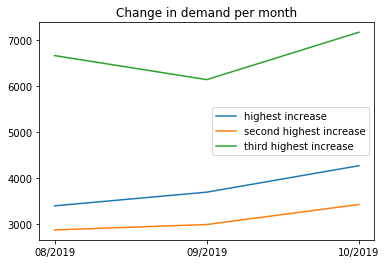

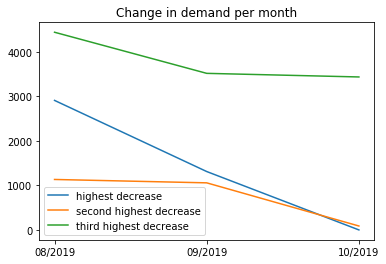

Largest increases in demand
{'Station ID': 29, 'Station Name': '29 REFORMA-BUCARELI', 'Change in rentals': 545}
{'Station ID': 16, 'Station Name': '16 REFORMA-RÍO TIBER', 'Change in rentals': 535}
{'Station ID': 242, 'Station Name': '242 MIGUEL DE CERVANTES SAAVEDRA-PROL MOLIERE ', 'Change in rentals': 511}
Largest decreases in demand
{'Station ID': 17, 'Station Name': '17 REFORMA-RIO TIBER', 'Change in rentals': -2733}
{'Station ID': 41, 'Station Name': '41 REFORMA-AV. DE LA REPUBLICA', 'Change in rentals': -1224}
{'Station ID': 404, 'Station Name': '404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE', 'Change in rentals': -901}


In [596]:
all_station_withdrwawals = [pd_08['Ciclo_Estacion_Retiro'],
                            pd_09['Ciclo_Estacion_Retiro'],
                            pd_10['Ciclo_Estacion_Retiro']]

largest_withdrawal_increases_overall, largest_withdrawal_decreases_overall = demand_changes_overall(
    all_station_withdrwawals, pd_stations, False, 471)

all_station_arrivals = [pd_08['Ciclo_Estacion_Arribo'],
                        pd_09['Ciclo_Estacion_Arribo'],
                        pd_10['Ciclo_Estacion_Arribo']]

largest_arrivals_increases_overall, largest_arrivals_decreases_overall = demand_changes_overall(
    all_station_arrivals, pd_stations, True, 471)

general_largest_increase = largest_withdrawal_increases_overall + largest_arrivals_increases_overall
general_largest_decrease = largest_withdrawal_decreases_overall + largest_arrivals_decreases_overall

print('Largest increases in demand')
for i in range(3):
    print(general_largest_increase[i])
    
print('Largest decreases in demand')
for i in range(3):
    print(general_largest_decrease[i])

### Las 3 estaciones que tuvieron el mayor incremento en la demanda fueron:
#### 29 REFORMA-BUCARELI, con un incremento de 545
#### 16 REFORMA-RÍO TIBER, con un incremento de 535
#### 242 MIGUEL DE CERVANTES SAAVEDRA-PROL MOLIERE con un incremento de 511

### Las 3 estaciones que tuvieron el mayor disminución en la demanda fueron:
#### 17 REFORMA-RIO TIBER, con una disminución de 2733
#### 41 REFORMA-AV. DE LA REPUBLICA, con una disminución de 1224
#### 404 MIGUEL LAURENT-AVENIDA DIVISIÓN DEL NORTE con una disminución de 901

### Cabe recalcar que algunas de las disminuciones en la cantidad de arribos se dan porque existen errores en los datos, al igual que en la lista de retiros. Existen estaciones con el mismo nombre, que se diferencian por una tilde y estos tienen un distinto id, por lo que se toman como estaciones distintas. 

### Aquí nuevamente vemos el error en los datos ya que REFORMA-RIO TIBER aparece en tanto la lista de mayor recibos como arribos

## Para calcular el cambio en demanda se utilizó la diferencia entre la cantidad de arribos o retiros al inicio del periodo del tiempo contra la cantidad al final. Este método fue utilizado ya que en términos de este servicio, es el más útil. <br /> Otro metodo que se pudo utilizar fue cambio de demanda porcentual, pero el porcentaje de incremento de demanda no siempre es util. <br /> Por ejemplo, si estación X pasó de 1000 a 1500 usos, tuvo un incremento de demanda porcentual del 50%. Otra estación Y paso de 10 a 30 usos, tuvo un incremento del 300%. <br /> Si se utilizara el cambio en demanda porcentual, se le daría más importancia al incremento de la estación Y, cuando en realidad es mucho más útil hacer énfasis en X. Los cambios en X generan mayor valor agregado y enseñan un cambio de mejor medida de los patrones del consumidor. <br /> Por ejemplo, en este caso, sería mucho más util incrementar el numero de bicicletas disponibles en estación X que en estación Y. <br /><br /><br /><br />

# ¿Qué relación existe entre los retiros y arribos entre estaciones?
### Utiliza la gráfica que consideres que explica mejor tales relaciones y que a la vez sea fácil de interpretar.


In [597]:
# modificar station_trips para que pueda buscar n estaciones más y menos transitadas.
def most_least_interactions(stations, pd_stations, num_stations, check_ties=False):
    """ Find the stations with most and least rentals.
    Inputs:
        stations:      list of stations where rental was made.
        station_names: data frame containing information about each station.
        check_ties:    boolean that decides if function looks for ties.
        num_stations:  number of stations with most and least trips user wants to receive
    Outputs:
        most_trips:  list containing tuples containing stations with most rentals and number of rentals. 
                     If check_ties parameter is True, it will return a list with all stations,
                     or a list with a single one if no ties found.
        least_trips: list containing tuples containing stations with least rentals and number of rentals.
                     If check_ties parameter is True, it will return a list with all stations,
                     or a list with a single one if no ties found.
    """
    counter = Counter(stations)
    if check_ties:
        return check_tie(counter)
    else:
        
        mc = counter.most_common()
        # most_common
        most_interactions = []
        
        for i in range(num_stations):
            top_dict = {
                        "Station ID": mc[i][0],
                        "Station Name": (pd_stations.loc[mc[i][0]]['name']),
                        "Number of Rentals": mc[i][1]
                       }
            most_interactions.append(top_dict)
            
        # least common
        
        # discard any station with an id bigger than the largest one from the station list.
        # these ids were probably recorded incorrecctly

        least_interactions = []
        for i in range(1, num_stations+1):
            least_dict = {
                        "Station ID": mc[-i][0],
                        "Station Name": (pd_stations.loc[mc[-i][0]]['name']),
                        "Number of Rentals": mc[-i][1]
                       }
            least_interactions.append(least_dict)
        
        return (most_interactions,least_interactions)

In [598]:
def plot_station_interactions(top, least, time_period, interaction_type):
    ''' Plots stations with most and least withdrawals or arrivals
    Inputs:
        top:              list containing dictionary of stations with most arrivals or withdrawals
        least: list       containing dictionary of stations with least arrivals or withdrawals
        time_period:      string with time period that the lists cover
        interaction_type: withdrawal or arrival
    Outputs:
        None
        Function only plots, returns None         
    '''
    if len(top) > 0:
        y_top = [rentals['Number of Rentals'] for rentals in top]
        x_top = [str(rentals['Station ID']) for rentals in top]

        plt.bar(x_top, y_top)
        title = 'Stations with most ' + interaction_type + ' in ' + time_period
        plt.title(title)
        plt.xlabel('Station ID')
        y_label = 'Number of ' + interaction_type
        plt.ylabel(y_label)
        plt.show()
    else:
        print("If top list is empty no plot will be made")
    
    if len(least) > 0:
        y_bottom = [rentals['Number of Rentals'] for rentals in least]
        x_bottom = [str(rentals['Station ID']) for rentals in least]

        plt.bar(x_bottom, y_bottom)
        title = ' Stations with least ' + interaction_type + ' in ' + time_period
        plt.title(title)
        plt.xlabel('Station ID')
        y_label = 'Number of ' + interaction_type
        plt.ylabel(y_label)
        plt.show()
    else:
        print("If least list is empty no plot will be made")

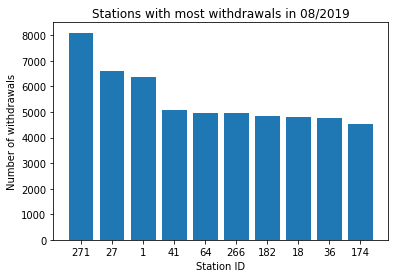

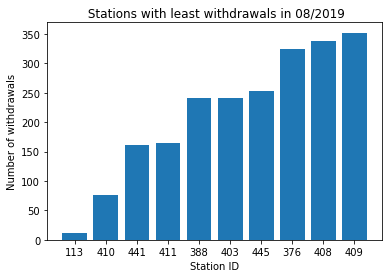

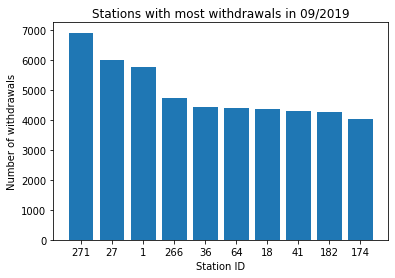

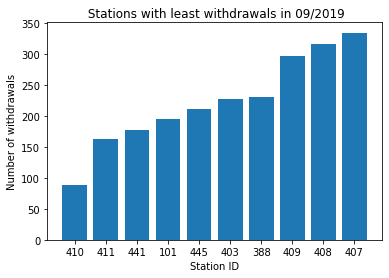

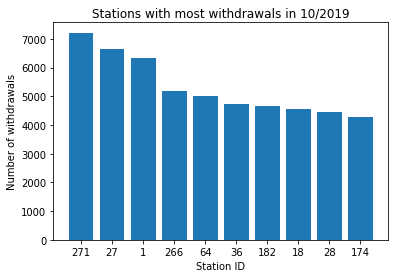

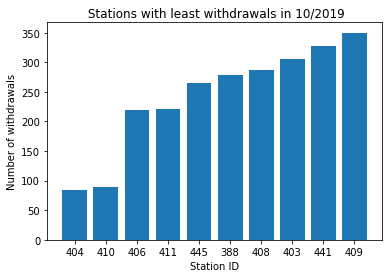

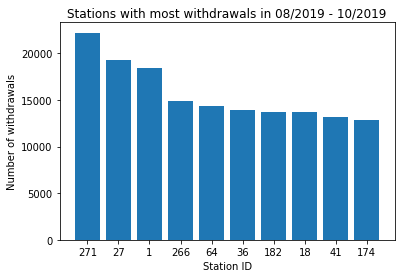

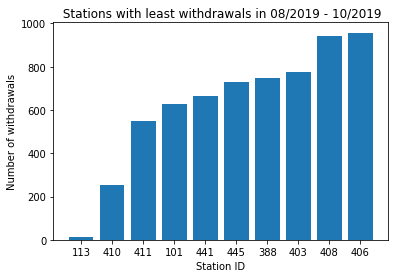

In [599]:
num_stations = 10
# 08/2019 period
top_retiro, least_retiro = most_least_interactions(pd_08['Ciclo_Estacion_Retiro'], pd_stations, num_stations)
plot_station_interactions(top_retiro, least_retiro, '08/2019', 'withdrawals')

# 09/2019 period
top_retiro, least_retiro = most_least_interactions(pd_09['Ciclo_Estacion_Retiro'], pd_stations, num_stations)
plot_station_interactions(top_retiro, least_retiro, '09/2019', 'withdrawals')

# 10/2019 period
top_retiro, least_retiro = most_least_interactions(pd_10['Ciclo_Estacion_Retiro'], pd_stations, num_stations)
plot_station_interactions(top_retiro, least_retiro, '10/2019', 'withdrawals')

# All months
all_retiros = np.hstack((pd_08['Ciclo_Estacion_Retiro'], pd_09['Ciclo_Estacion_Retiro'],
                         pd_10['Ciclo_Estacion_Retiro']))

top_retiros_total, least_retiros_total = most_least_interactions(all_retiros, pd_stations, num_stations)
plot_station_interactions(top_retiros_total, least_retiros_total, '08/2019 - 10/2019', 'withdrawals')

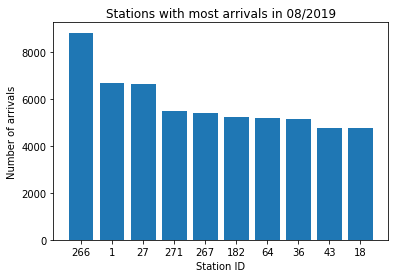

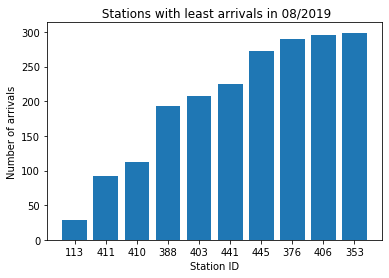

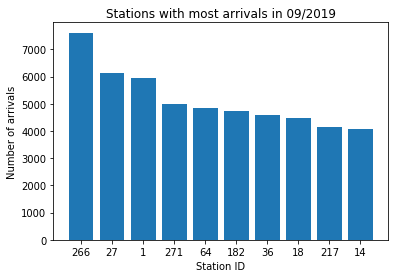

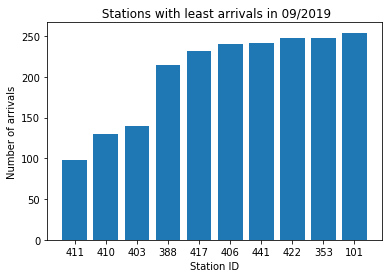

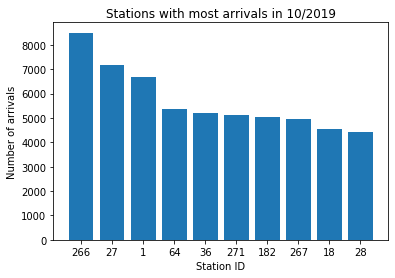

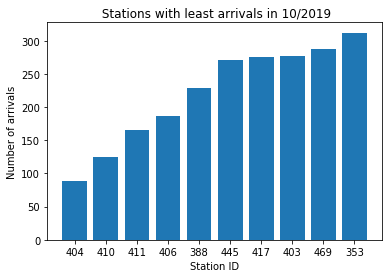

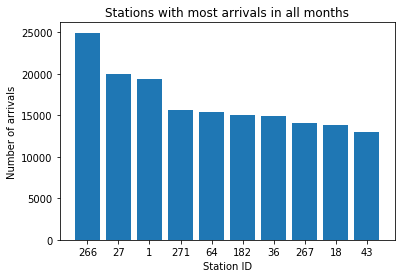

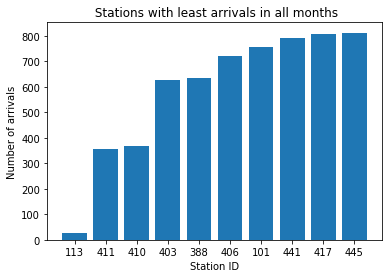

In [600]:
# 08/2019 period
top_arrivals, least_arrivals = most_least_interactions(pd_08['Ciclo_Estacion_Arribo'], pd_stations, num_stations)
plot_station_interactions(top_arrivals, least_arrivals, '08/2019', 'arrivals')

# 09/2019 period
top_arrivals, least_arrivals = most_least_interactions(pd_09['Ciclo_Estacion_Arribo'], pd_stations, num_stations)
plot_station_interactions(top_arrivals, least_arrivals, '09/2019', 'arrivals')

# 10/2019 period
top_arrivals, least_arrivals = most_least_interactions(pd_10['Ciclo_Estacion_Arribo'], pd_stations, num_stations)
plot_station_interactions(top_arrivals, least_arrivals, '10/2019', 'arrivals')

# All months
all_arrivals = np.hstack((pd_08['Ciclo_Estacion_Arribo'], pd_09['Ciclo_Estacion_Arribo'],
                         pd_10['Ciclo_Estacion_Arribo']))

top_arrivals_total, least_arrivals_total = most_least_interactions(all_arrivals, pd_stations, num_stations)
plot_station_interactions(top_arrivals_total, least_arrivals_total, 'all months', 'arrivals')

In [601]:
# Encontrar porcentajes de retiros y arribos que se hacen en las n estaciones más y menos utilizadas
top_retiros_total, least_retiros_total = most_least_interactions(all_retiros, pd_stations, num_stations)
top_n_retiros = [retiros['Number of Rentals'] for retiros in top_retiros_total]
total_retiros_top_n = sum(top_n_retiros)
tmp = 'Porcentaje de todos los retiros se hacen desde las ' + str(num_stations) + ' estaciones con más retiros '
print(tmp, total_retiros_top_n/all_retiros.shape[0]*100)

bottom_n_retiros = [retiros['Number of Rentals'] for retiros in least_retiros_total]
total_retiros_bottom_n = sum(bottom_n_retiros)
tmp = 'Porcentaje de todos los retiros se hacen desde las ' + str(num_stations) + ' estaciones con menos retiros '
print(tmp, total_retiros_bottom_n/all_retiros.shape[0]*100)

print()

top_arrivals_total, least_arrivals_total = most_least_interactions(all_arrivals, pd_stations, num_stations)
top_n_arrivals = [arrivals['Number of Rentals'] for arrivals in top_arrivals_total]
total_arrivals_top_n = sum(top_n_arrivals)
tmp = 'Porcentaje de todos los arrivals se hacen desde las ' + str(num_stations) + ' estaciones con más arrivals '
print(tmp, total_arrivals_top_n/all_arrivals.shape[0]*100)

bottom_n_arrivals = [retiros['Number of Rentals'] for retiros in least_arrivals_total]
total_arrivals_bottom_n = sum(bottom_n_arrivals)
tmp = 'Porcentaje de todos los arrivals se hacen desde las ' + str(num_stations) + ' estaciones con menos arrivals '
print(tmp, total_arrivals_bottom_n/all_retiros.shape[0]*100)

print()
tmp = str(num_stations) + ' estaciones representan el siguiente porcentaje de todas las estaciones '
print(tmp, num_stations/pd_stations.shape[0]*100)

Porcentaje de todos los retiros se hacen desde las 10 estaciones con más retiros  7.239852262063801
Porcentaje de todos los retiros se hacen desde las 10 estaciones con menos retiros  0.28923537759616136

Porcentaje de todos los arrivals se hacen desde las 10 estaciones con más arrivals  7.685469816806808
Porcentaje de todos los arrivals se hacen desde las 10 estaciones con menos arrivals  0.2726402840118523

10 estaciones representan el siguiente porcentaje de todas las estaciones  2.083333333333333


In [602]:
def get_ids(station_list):
    ''' Finds the ids from a list of stations
    Input:
        station_list: list of stations, the column with the station ids must be named Station ID
    Output: 
        ids: list of ids
    '''
    ids = []
    for element in station_list:
        ids.append(element['Station ID'])
    return ids

In [603]:
def plot_venn(tuple_with_sets, tuple_with_set_names, title):
    ''' Plots venn diagram when given two sets
        Inputs:
            tuple_with_sets: tuple containing set a and b which will be used to create venn diagram.
            tuple_with_set_names: tuple containing the name of set a and b which will be used to create venn diagram.
            title: string containing title of Venn diagram
        Outputs:
            None
    '''
    v = venn2([tuple_with_sets[0], tuple_with_sets[1]],
          set_labels = (tuple_with_set_names[0], tuple_with_set_names[1]))
    plt.title(title)
    plt.show()

Utilizando 10 estaciones


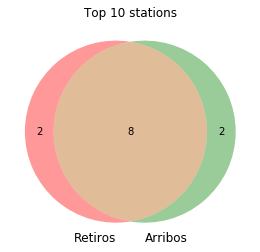

Estaciones con más retiros: [271, 27, 1, 266, 64, 36, 182, 18, 41, 174]
Estaciones con más arrivos: [266, 27, 1, 271, 64, 182, 36, 267, 18, 43]
Cantidad de estaciones compartidas en lista de más retiros y arribos: 8
Porcentaje de estaciones en ambas listas: 80.0



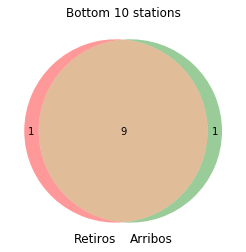

Estaciones con menos retiros: [113, 410, 411, 101, 441, 445, 388, 403, 408, 406]
Estaciones con menos arrivos: [113, 411, 410, 403, 388, 406, 101, 441, 417, 445]
Cantidad de estaciones compartidas en lista de menos retiros y arribos: 9
Porcentaje de estaciones en ambas listas: 90.0



Utilizando 20 estaciones


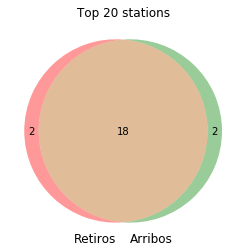

Estaciones con más retiros: [271, 27, 1, 266, 64, 36, 182, 18, 41, 174, 28, 15, 24, 14, 43, 146, 47, 208, 38, 217]
Estaciones con más arrivos: [266, 27, 1, 271, 64, 182, 36, 267, 18, 43, 28, 174, 217, 14, 38, 24, 47, 15, 7, 41]
Cantidad de estaciones compartidas en lista de más retiros y arribos: 18
Porcentaje de estaciones en ambas listas: 90.0



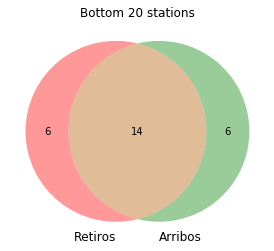

Estaciones con menos retiros: [113, 410, 411, 101, 441, 445, 388, 403, 408, 406, 409, 376, 407, 429, 469, 353, 418, 344, 417, 378]
Estaciones con menos arrivos: [113, 411, 410, 403, 388, 406, 101, 441, 417, 445, 353, 469, 376, 382, 350, 367, 407, 422, 362, 368]
Cantidad de estaciones compartidas en lista de menos retiros y arribos: 14
Porcentaje de estaciones en ambas listas: 70.0



Utilizando 100 estaciones


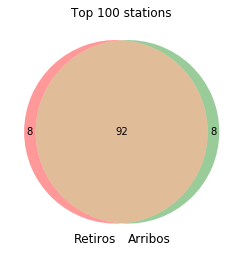

Estaciones con más retiros: [271, 27, 1, 266, 64, 36, 182, 18, 41, 174, 28, 15, 24, 14, 43, 146, 47, 208, 38, 217, 211, 7, 136, 23, 141, 270, 32, 16, 20, 107, 134, 390, 45, 86, 74, 26, 25, 295, 37, 194, 19, 272, 72, 84, 10, 116, 29, 6, 158, 82, 53, 31, 242, 145, 111, 183, 11, 63, 52, 119, 35, 151, 59, 124, 46, 40, 66, 34, 21, 77, 56, 115, 197, 73, 54, 68, 103, 135, 150, 126, 30, 96, 206, 51, 80, 121, 85, 305, 71, 3, 9, 142, 476, 69, 123, 125, 237, 2, 5, 180]
Estaciones con más arrivos: [266, 27, 1, 271, 64, 182, 36, 267, 18, 43, 28, 174, 217, 14, 38, 24, 47, 15, 7, 41, 16, 136, 141, 146, 134, 23, 295, 74, 25, 270, 116, 32, 107, 37, 29, 208, 63, 59, 45, 390, 72, 31, 6, 26, 151, 20, 145, 96, 158, 30, 53, 68, 82, 211, 46, 19, 52, 11, 66, 56, 150, 10, 84, 183, 135, 124, 126, 194, 51, 242, 71, 305, 119, 35, 111, 54, 40, 34, 86, 73, 197, 9, 80, 103, 163, 476, 206, 5, 115, 121, 142, 164, 85, 87, 149, 77, 129, 69, 302, 254]
Cantidad de estaciones compartidas en lista de más retiros y arribos: 

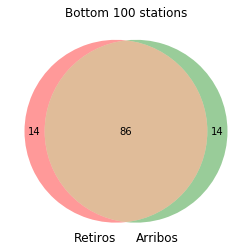

Estaciones con menos retiros: [113, 410, 411, 101, 441, 445, 388, 403, 408, 406, 409, 376, 407, 429, 469, 353, 418, 344, 417, 378, 434, 422, 367, 415, 361, 368, 350, 401, 424, 444, 457, 100, 362, 383, 428, 360, 311, 289, 382, 435, 379, 479, 443, 456, 346, 355, 105, 426, 416, 413, 438, 343, 364, 400, 262, 283, 399, 380, 381, 94, 349, 395, 423, 446, 279, 430, 453, 339, 348, 370, 421, 93, 412, 307, 322, 345, 414, 431, 97, 275, 419, 437, 467, 332, 404, 102, 88, 296, 358, 327, 89, 203, 454, 81, 218, 373, 220, 91, 330, 315]
Estaciones con menos arrivos: [113, 411, 410, 403, 388, 406, 101, 441, 417, 445, 353, 469, 376, 382, 350, 367, 407, 422, 362, 368, 311, 429, 383, 364, 344, 349, 418, 330, 456, 416, 378, 424, 457, 408, 289, 438, 343, 332, 379, 415, 435, 339, 453, 444, 434, 346, 409, 381, 360, 361, 413, 203, 355, 428, 333, 348, 279, 213, 401, 275, 423, 100, 380, 307, 283, 426, 105, 479, 220, 467, 462, 400, 345, 387, 421, 395, 81, 366, 399, 414, 466, 322, 94, 199, 431, 358, 318, 437, 327, 44

In [604]:
n_num_stats = [10,20,100]

top_percents = []
least_percents = []

for num_stats in n_num_stats:
    print('Utilizando', num_stats, 'estaciones')
    top_retiros_total, least_retiros_total = most_least_interactions(all_retiros, pd_stations, num_stats)
    top_arrivals_total, least_arrivals_total = most_least_interactions(all_arrivals, pd_stations, num_stats)

    top_retiros_ids = get_ids(top_retiros_total)
    top_arrivals_ids = get_ids(top_arrivals_total)
    
    # For Venn Diagram creation
    venn_labels = ('Retiros','Arribos')
    
    top_set_tuple = (set(top_retiros_ids),set(top_arrivals_ids))
    top_venn_title = 'Top ' + str(num_stats) + ' stations'
                     
    
    plot_venn(top_set_tuple, venn_labels, top_venn_title)

    print('Estaciones con más retiros:',top_retiros_ids)
    print('Estaciones con más arrivos:',top_arrivals_ids)
    intersection_top = list(set(top_retiros_ids) & set(top_arrivals_ids))
    print('Cantidad de estaciones compartidas en lista de más retiros y arribos:',len(intersection_top))
    top_intersection_percent = len(intersection_top)/num_stats * 100
    top_percents.append(top_intersection_percent)
    print('Porcentaje de estaciones en ambas listas:', top_intersection_percent)
    print()

    least_retiros_ids = get_ids(least_retiros_total)
    least_arrivals_ids = get_ids(least_arrivals_total)
    
    # For Venn Diagram creation    
    least_set_tuple = (set(least_retiros_ids),set(least_arrivals_ids))
    least_venn_title = 'Bottom ' + str(num_stats) + ' stations'
                     
    
    plot_venn(least_set_tuple, venn_labels, least_venn_title)
    
    print('Estaciones con menos retiros:',least_retiros_ids)
    print('Estaciones con menos arrivos:',least_arrivals_ids)
    intersection_least = list(set(least_retiros_ids) & set(least_arrivals_ids))
    print('Cantidad de estaciones compartidas en lista de menos retiros y arribos:',len(intersection_least))
    intersection_least = len(intersection_least)/num_stats * 100
    least_percents.append(intersection_least)
    print('Porcentaje de estaciones en ambas listas:', intersection_least)

    print('\n' * 2)

print("mean percent de las estaciones más utilizadas: ", np.mean(top_percents)) 
print("mean percent de las estaciones menos utilizadas: ", np.mean(least_percents)) 

In [605]:
pd_08_copy = pd_08[['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']].copy()
pd_09_copy = pd_09[['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']].copy()
pd_09_copy = pd_09_copy.reset_index(drop=True)
pd_08_and_09 = pd.concat([pd_08_copy, pd_09_copy], axis=0)


pd_10_copy = pd_10[['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']].copy()
pd_10_copy = pd_10_copy.reset_index(drop=True)
pd_all_months = pd.concat([pd_08_and_09, pd_10_copy], axis=0)

assert pd_08.shape[0]+pd_09.shape[0]+pd_10.shape[0] == pd_all_months.shape[0]

pd_all_months['Same_Station'] = np.where((
    pd_all_months['Ciclo_Estacion_Retiro']== pd_all_months['Ciclo_Estacion_Arribo']), True, False)
    
true_count = pd_all_months.Same_Station.sum()
print('Cantidad de viajes que empiezan y terminan en la misma estación:', true_count)

print('Porcentaje de viajes que empiezan y terminan en la misma estación: '
      ,true_count/len(pd_all_months.index)*100)


Cantidad de viajes que empiezan y terminan en la misma estación: 68634
Porcentaje de viajes que empiezan y terminan en la misma estación:  3.172667557285431


### Como se puede observar en las celdas anteriores, existe una enorme intersección entre las estaciones de los retiros y arribos. Por ejemplo, las estaciones con id 27, 1 y 271 aparecen entre las top 5 estaciones en tanto la lista de más retiros y más arribos. Por otro lado, las estaciones con id 113, 410 y 411 aparecen entre las top 5 estaciones en tanto la lista de menos retiros y menos arribos.

### Seguidamente, podemos ver que en promedio, arriba del 85% de las estaciones más utilizadas para retiros como arrivos son las mismas. Asimismo, el 82% de las estaciones menos utilizadas para retiros como arrivos son las mismas.

### Con esta información podemos ver que en general, las estaciones tienen un uso similar en cuento retiros y arribos, por lo que existen estaciones más populares que otras.

### Esto se puede observar perfectamente en los Venn diagrams, que demuestra la enorme interseccion entre tanto las estaciones con más arribos y retiros, como lás estaciones que menos tienen ambos

### Esta misma información nos puede hacer creer que en general los viajes empiezan y terminan en la misma estación. Este caso de uso sería que una persona renta una bicicleta, hace sus viajes y la regresa en el mismo lugar. Lo interesante es que los datos muestran que ese no es el caso.

### Solamente el ~3.2% de los viajes comienzan y terminan en la misma estación, por lo que la popularidad de las estaciones va más alla de simplemente las más utilizadas, sino que deben existir relaciones en las rutas que hay entre dichas estaciones muy utilizadas.

### Otra observación interesante es que en las 5 estaciones más utilizadas (que representa el ~1% de las estaciones) se llevan acabo más de 4% de todos los retiros y arribos. Asimismo, en las 10 estaciones más utilizadas (que representa el ~2% de las estaciones) se llevan acabo más de 7% de todos los retiros y arribos. 

### Por otra parte, las 50 estaciones menos utilizadas (que representa el ~10% de las estaciones) se llevan acabo menos del 3% de todos los retiros y arribos. Si revisamos las 100 estaciones menos utilizadas (que representa el ~20% de las estaciones), este numero sube solamente al ~7% de todos los retiros y arribos.

### Con lo mencionado anteriormente podemos ver que las 10 estaciones más utilizadas represtan un uso similar al de las 100 estaciones menos utilizadas. Asimismo, que los porcentajes de retiros y arribos siempre fueron muy similares en todas las comparaciones.

### En conclusión existe una importante relación entre arribos y retiros en las estaciones. En general las estaciones con más arribos son las mismas que tienen más retiros y además sabemos que es muy raro que un viaje se inicia y termine en la misma estación. <br /><br />

# Realiza una segmentación de las estaciones. La segmentación puede ser del número de bicis, del número de viajes, o de cualquier factor que creas relevante. Lo importante es la explicación del por qué se hizo esa segmentación, cómo se hizo y por qué pudiera ser valiosa o interesante esta segmentación.


## Tomando en cuenta que ya tenemos conocimiento de las estaciones más y menos transitadas, así como las que tienen un mayor crecimiento, me parece que una segmentación interesante que se puede hacer es conseguir las rutas más transitadas. Cabe recalcar que anteriormente, nos dimos cuenta que solo un muy pequeño porcentaje de los viajes comienzan y terminan en la misma estación.<br/> Una ruta se refiere a la tupla de estaciones retiro-arribo y puede ayudarnos a entender de mejor manera el moviemento de las bicicletas en la ciudad, asi como cuales zonas necesitan tener un mayor flujo de bicicletas.

In [606]:
def get_all_routes_count(pd_months):
    ''' Finds all routes from dataframe of trips.
        Inputs:
            pd_months: dataframe of trips
        Outputs:
            mc: ordered counter of all routes and number of trips done for each one
    '''
    station_pairs = zip(pd_months['Ciclo_Estacion_Retiro'],pd_months['Ciclo_Estacion_Arribo'])
    counter = Counter(station_pairs)
    mc = counter.most_common()
    
    return mc

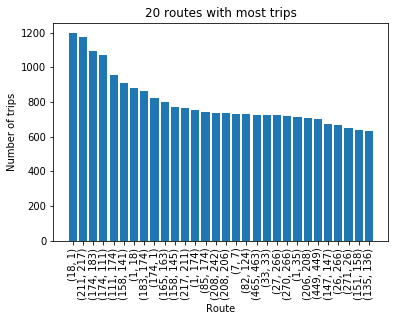

Total Trips: 2163290
Size of the set of most popular stations (based con withdrawals and arrivals: 58
A route is made up of 2 stations
Total numer of routes: 129711 

There are 11 stations in the top 10 routes
7 out of the 11 are also in the list of stations with most demand (63.63636363636363%)
The top 10 routes have over 773 trips each
Sum of all trips from the top 10 routes: 9770
Percent of total trips that the top 10 routes represent: 0.45162692010779876
Percent of total routes that the top 10 routes represent: 0.007709446384655118
11 stations make up 0.45162692010779876 % of all trips


There are 27 stations in the top 25 routes
14 out of the 27 are also in the list of stations with most demand (51.85185185185185%)
The top 25 routes have over 671 trips each
Sum of all trips from the top 25 routes: 20754
Percent of total trips that the top 25 routes represent: 0.9593720675452668
Percent of total routes that the top 25 routes represent: 0.019273615961637795
27 stations make up 0.959

In [607]:
mc = get_all_routes_count(pd_all_months)

n_stats = 50
top_20_routes = []
for i in range(30):
    top_20_routes.append(mc[i])
    
y_routes = [routes[1] for routes in top_20_routes]
x_routes = [str(routes[0]) for routes in top_20_routes]

plt.bar(x_routes, y_routes)
plt.title('20 routes with most trips')
plt.xlabel('Route')
plt.ylabel('Number of trips')
plt.xticks(rotation=90)
plt.show()

total_num_trips = pd_08.shape[0]+pd_09.shape[0]+pd_10.shape[0]
print("Total Trips:", total_num_trips)
num_routes = len(mc)
print('Size of the set of most popular stations (based con withdrawals and arrivals:',len(most_demanded_stations))
print('A route is made up of 2 stations')
print('Total numer of routes:', num_routes, '\n')

top_retiros_total, least_retiros_total = most_least_interactions(all_retiros, pd_stations, n_stats)
top_arrivals_total, least_arrivals_total = most_least_interactions(all_arrivals, pd_stations, n_stats)

top_retiros_ids = get_ids(top_retiros_total)
top_arrivals_ids = get_ids(top_arrivals_total)

most_demanded_stations = list(set(top_retiros_ids).union(set(top_arrivals_ids)))


top_list = [10,25,50,100,500,1000,5000,10000]
trip_quantity_limit_for_top_n_routes = [mc[i][1] for i in top_list]


for n_trips in trip_quantity_limit_for_top_n_routes:
    routes_with_over_n_trips = [element for element in mc if element[1] > n_trips]
    
    total_trips_n_top_routes = [element[1] for element in routes_with_over_n_trips]
    top_n = len(routes_with_over_n_trips)
    
    stations_in_top_n_routes = [element[0] for element in routes_with_over_n_trips]
    stations_in_top_n_routes = list(sum(stations_in_top_n_routes, ()))
    set_stations_in_top_n_routes = set(stations_in_top_n_routes)
    unique_staion_top_n_routes = len(set_stations_in_top_n_routes)
    
    top_route_stations_in_most_demanded_station = [element for element in set_stations_in_top_n_routes
                                                   if element in most_demanded_stations]
    top_route_demand_intersection = len(top_route_stations_in_most_demanded_station)
    
    
    print('There are',unique_staion_top_n_routes,'stations in the top', top_n, 'routes')
    print(top_route_demand_intersection, ' out of the ',
         unique_staion_top_n_routes,' are also in the list of stations with most demand ',
         "(", top_route_demand_intersection/unique_staion_top_n_routes*100, "%)",sep="")
    print('The top', top_n, 'routes have over', n_trips, 'trips each')
    
    sum_total_trips_n_top_routes = sum(total_trips_n_top_routes)
    print('Sum of all trips from the top',top_n,'routes:',sum_total_trips_n_top_routes)
    print('Percent of total trips that the top',top_n,'routes represent:',
          sum_total_trips_n_top_routes/total_num_trips*100)
    print('Percent of total routes that the top',top_n,'routes represent:',
          top_n/num_routes*100)
    print(unique_staion_top_n_routes, 'stations make up',
          sum_total_trips_n_top_routes/total_num_trips*100,'% of all trips')
    print('\n')

## Esta segmentación nos demuestra varios aspectos interesantes:
## Primeramente, que no existe una ruta realmente mucho más utilizada que todas las demás. En términos generales, la cantidad de viajes en la lista de rutas ordenada por viajes no tiene una variación muy grande entre elementos continuos. <br /> Además, nos damos cuenta que no existe un grupo pequeño de rutas que controle un porcentaje muy grande de los viajes totales. Por ejemplo, en las 10 rutas más comunes (0.077% de las rutas), se llevan a cabo el ~0.45% de los viajes. Aunque esto si represente un orden de magnitud porcentual de diferencia, no nos lleva a la conclusión de que un muy pequeño grupo de estaciones tienen un control principal en los viajes. Si este fuera el caso, valdría la pena asegurarse que las estaciones de esas rutas siempre tengan bicicletas y personal disponible.  

## Para el siguiente párrafo, llámese estaciones populares al conjunto generado por conseguir las 50 estaciones con más arrivos, las 50 estaciones con mas retiros y generar un set con ambos conjuntos. Este set contiene 58 estaciones.

## Otro dato del que nos damos cuenta, es que el porcentaje de las 58 estaciones más popularesque aparecen dentro de las listas de estaciones de las rutas mas comunes no es tan alto como uno podría esperarse. Por ejemplo, las 10 rutas más comunes están compuestas por 11 estaciones, de las cuales 7 están en la lista de las mas populares (63%). Si pasamos a las 50 rutas con más viajes, que están compuestas por 49 estaciones, solamente el ~42% de las estaciones aparecen en la lista de las 50 más populares. (Se pueden ver datos más detallados en el resultado de la celda anterior) Esto nos vuelve a demostrar que no existe un selecto grupo de estaciones mucho más dominante que el resto.

## Viendo estos mismos datos de otra manera, es interesante notar que si nos vamos a las 50 rutas más comunes (que representa un ~0.04% de las rutas totales), podemos notar que estas conforman arriba del 1.6% de todos los viajes. Esto se ejemplifica aún mejor con el hecho de que las 1000 rutas (0.77% de las rutas totales) acumula arriba de un 13% de los viajes totales. Esto es interesante y útil ya que no simplemente se tiene ni una distribución homogénea de las bicicletas por la zona, ni se tiene un conglomerado de viajes basado en 5 o 10 rutas, que ayuda a indicarnos que las estaciones no están mal colocadas ya que esto sucedería si solamente hubieran muy pocas estaciones en un área de gran importancia. 
## Básandonos en lo mismo mencionado anteriormente, podemos llegar a la conclusión de que existe un flujo sano de bicicletas entre las zonas más ocupadas, ya que la proporción de viajes realizados en zonas importantes, está distribiudo en diversas rutas, lo que no permite que se acumelen muchas bicicletas en una misma, o un muy pequeño grupo de estaciones.
## Basado en lo anterior, yo le recomendaría a Ecoboci concentrarse en mantener bien habilitadas y ordenadas las estaciones de las rutas más utilizadas, ya que el esfuerzo necesario es mucho menor a lo que puede ganar si se asegura que no haya problemas en la zona. De igual manera les daría la recomendación de no concentrarse solamente en las 10 estaciones con más demanda ya que la heterogeneidad de sus rutas demuestra que la importancia de su servicio está en una buena distribución de bicicletas y no en la concentración de las mismas en estaciones que suponen ser muy superiores. <br /><br />




## Otra segmentación interesante, como se presenta en la lista de preguntas del challenge es la cantidad de bicicletas

In [608]:
pd_08_bici = pd_08['Bici'].copy()
pd_09_bici = pd_09['Bici'].copy()
pd_10_bici = pd_10['Bici'].copy()


set_bici_08 = set(pd_08_bici)
set_bici_09 = set(pd_09_bici)
set_bici_10 = set(pd_10_bici)
bici_total = set_bici_08.union(set_bici_09.union(set_bici_10))
total_number_trips = pd_08.shape[0]+pd_09.shape[0]+pd_10.shape[0]


print('Cantidad de bicicletas utilizadas en el mes 08:',len(set_bici_08))
print('Cantidad de bicicletas utilizadas en el mes 09:',len(set_bici_09))
print('Cantidad de bicicletas utilizadas en el mes 10:',len(set_bici_10))

print('Cantidad de bicicletas utilizadas en total:',len(bici_total))
print('Cantidad total de viajes realizados en todos los meses',total_number_trips)


print('Promedio de viajes que hizo cada bicicleta en el periodo completo:',
      math.ceil(total_number_trips/len(bici_total)))

# Suponiendo que todas las estaciones tienen la misma cantidad de biciletas
print('Cantidad de bicicletas por estación:', math.floor(len(bici_total)/pd_stations.shape[0]))

Cantidad de bicicletas utilizadas en el mes 08: 5818
Cantidad de bicicletas utilizadas en el mes 09: 5596
Cantidad de bicicletas utilizadas en el mes 10: 10424
Cantidad de bicicletas utilizadas en total: 10964
Cantidad total de viajes realizados en todos los meses 2163290
Promedio de viajes que hizo cada bicicleta en el periodo completo: 198
Cantidad de bicicletas por estación: 22


In [609]:
# CUANTAS BICIS NECESITA TENER LAS RUTAS MAS TRANSITADAS PARA MANTENER < 200 viajes por bici
n_for_fn = 10
top_withdrawals_for_bike, least_withdrawals_for_bike = most_least_interactions(all_withdrawals, pd_stations, n_for_fn)
top_withdrawals = [x['Number of Rentals'] for x in top_withdrawals_for_bike]
least_withdrawals = [x['Number of Rentals'] for x in least_withdrawals_for_bike]

top_withdrawls_avg = sum(top_withdrawals)/n_for_fn
least_withdrawls_avg = sum(least_withdrawals)/n_for_fn

print('Asumiendo que todas las estaciones tienen la misma cantidad de bicicletas')
# 22 is taken from the previous cell for convenience
print('Promedio de viajes por bicicleta de las',
      n_for_fn,'estaciones más utilizadas:',
      math.ceil(top_withdrawls_avg/22))
print('Promedio de viajes por bicicleta de las',
      n_for_fn,'estaciones menos utilizadas:',
      math.ceil(least_withdrawls_avg/22))

improved_distribution_num_bikes_for_top = math.ceil(top_withdrawls_avg/198)
improved_distribution_num_bikes_for_bottom = math.ceil(least_withdrawls_avg/198)
print('\n')

print('Para mejorar la distribución de bicicletas con el fin de arreglar la enorme variabilidad de viajes/bici:')
print('Cantidad bicis en estaciones más usadas para llegar a promedio de 198 viajes/bici:',
      improved_distribution_num_bikes_for_top)
print('Cantidad bicis en estaciones menos usadas para llegar a promedio de 198 viajes/bici:',
      improved_distribution_num_bikes_for_bottom)

Asumiendo que todas las estaciones tienen la misma cantidad de bicicletas
Promedio de viajes por bicicleta de las 10 estaciones más utilizadas: 712
Promedio de viajes por bicicleta de las 10 estaciones menos utilizadas: 29


Para mejorar la distribución de bicicletas con el fin de arreglar la enorme variabilidad de viajes/bici:
Cantidad bicis en estaciones más usadas para llegar a promedio de 198 viajes/bici: 80
Cantidad bicis en estaciones menos usadas para llegar a promedio de 198 viajes/bici: 4


## Para los cálculos anteriores se tomo como base que es ideal que una bicicleta haga en promedio 198 viajes en un periodo de 3 meses. A este numero se llegó ya que si conseguimos el numero de viajes por bicicleta, llegamos a un uso de 198 veces. <br /> Asimismo, para demostrar la importancia de mantener mayores bicicletas se asumió que todas las estaciones tienen la misma cantidad de bicicletas: 22. A este numeró se llegó dividiendo la cantidad de bicicletas entre el número de esatciones.
## Tomando 198 viajes en el periodo de 3 meses como base, y 22 bicicletas por estación, nos damos cuenta que en promedio, las bicicletas de las 10 estaciones con más viajes hicieron  712 viajes. <br /> De la misma manera, podemos notar que las bicicletas de las 10 estaciones con menos viajes hicieron 29 viajes. <br /> Si ambas de estas estaciones tienen el mismo número de bicicletas disponible, no solamente las bicicletas de las 10 estaciones con más uso van a dañarse mucho más rápido; Sino que también es muy posible que sea normal que en esas estaciones hagan falta bicicletas, mientras que en las estaciones con menos viajes siempre sobren bicicletas. <br /> Esto hace, por una parte, que el servicio no sea de la mejor caldiad (tiempo de espera de los usuarios por falta de bicicletas) sino que hace que los dueños de Ecobici pierdan utilidad ya que tienen bienes que no se están utilizando para generar un valor agregado.

## Si quisieramos controlar que esto no pase, podríamos intentar que en las estaciones más utilizadas hayan en promedio 80 bicicletas, ya que esto haría que la cantidad de viajes por bicicleta baje, en promedio, a 198. <br /> De  igual manera, para dejar a las bicicletas de las estaciones menos utilizadas logrando los 198 viajes en promedio, solamente se necesitan 4 bicicletas. Esto nos demuestra que, si es que las bicicletas están distribuidas equitativamente, hay en promedio 18 bicicletas con uso extremadamente bajo en estas estaciones. <br /> Se pueden trasladar bicicletas de dichas estaciones a las más utilizadas.

## Siendo honesto, dudo que Ecobici tenga una distribución equitativa de bicicletas por estación, pero esta segmentación ayuda a saber cuales zonas se deben revisar más y mantener con suficientes bicicletas con el fin de minimizar el costo de arreglos y maximizar la experiencia del usuario.

## Cabe recalcar que si algun experto en bicicletas argumenta que el número óptimo de viajes cada 3 meses por bicicleta es un número diferente, lo único que se debe hacer es utilizar dicho número para hacer los cálculos y decidir cuantas bicicletas distribuir y donde ponerlas.

# Utiliza la información georreferenciada de las estaciones para crear una visualización en un mapa. En este inciso puedes incluir la información extra que desees.


### Nota importante para los cálculos en la función calc_center_of_locations: Dado que las estaciones están relativamente cerca la una de la otra, podemos suponer que la Tierra es plana para encontrar el centro de los puntos

In [610]:
def calc_center_of_locations(L):
    lat = []
    long = []
    for l in L :
        lat.append(l[0])
        long.append(l[1])
        
        avg_lat = sum(lat)/len(lat)
        avg_long = sum(long)/len(long)
        
        return (avg_lat,avg_long)

In [611]:
def create_map(df, center, top_stations, bottom_stations, zoom=13):
    ''' Creates map shwing all stations
        Inputs:
            df: dataframe that must have latitudes and longitues for each station.
            df.shape[0] MUST be the number of stations.
            center: tuple (latitude,longitude) where used wants the center of the map to be
            zoom: initial zoom for the map
    '''
    m = folium.Map(
    location=[center[0], center[1]],
    zoom_start=zoom,
    tiles='Stamen Terrain')
    
    for station_id, row in df.iterrows():
        tooltip = station_id
        color = 'blue'
        if station_id in top_stations:
            color = 'red'
        if station_id in bottom_stations:
            color = 'gray'
        
        folium.Marker([row['lat'], row['lon']],
                      popup= row['name'],
                      icon=folium.Icon(color=color),
                      tooltip=tooltip).add_to(m)
        
    return m

In [616]:
pd_stations_lat_long = pd_stations.copy()

lat_lon_pairs = list(zip(pd_stations_lat_long['lat'],pd_stations_lat_long['lon']))

center = calc_center_of_locations(lat_lon_pairs)

# most important stations
num_most_important_station = 30
stations_top_retiros_total, stations_least_retiros_total = most_least_interactions(
                                                            all_retiros, pd_stations, num_most_important_station)
stations_top_arrivals_total, stations_least_arrivals_total = most_least_interactions(
                                                                all_arrivals, pd_stations, num_most_important_station)


stations_top_retiros_ids = get_ids(stations_top_retiros_total)
stations_top_arrivals_ids = get_ids(stations_top_arrivals_total)

set_top_stations = set(stations_top_retiros_ids).union(set(stations_top_arrivals_ids))

stations_least_retiros_ids = get_ids(stations_least_retiros_total)
stations_least_arrivals_ids = get_ids(stations_least_arrivals_total)

set_least_stations = set(stations_least_retiros_ids).union(set(stations_least_arrivals_ids))

station_map = create_map(pd_stations_lat_long, center, set_top_stations, set_least_stations)
print('The', len(set_top_stations), 'stations with most demand appear in red')
print('The', len(set_least_stations), 'stations with least demand appear in gray')
station_map.save('station_map.html')
station_map

The 35 stations with most demand appear in red
The 39 stations with least demand appear in gray


In [614]:
top_demand_list = []
for element in stations_top_retiros_total:
    top_demand_list.append(element['Number of Rentals'])
for element in stations_top_arrivals_total:
    top_demand_list.append(element['Number of Rentals'])
    
top_demand_total = sum(top_demand_list)
    
least_demand_list = []
for element in stations_least_retiros_total:
    least_demand_list.append(element['Number of Rentals'])
for element in stations_least_arrivals_total:
    least_demand_list.append(element['Number of Rentals'])

least_demand_total = sum(least_demand_list)

print('Demanda de las estaciones en rojo:',top_demand_total)
print('Demanda de las estaciones en gris:',least_demand_total)
print('Diferencia en magnitud de la demanda',top_demand_total/least_demand_total)

Demanda de las estaciones en rojo: 761378
Demanda de las estaciones en gris: 58222
Diferencia en magnitud de la demanda 13.077152966232696


## En el mapa, si se hace hover con el mouse sobre una estación, aparece el id de dicha estacion. <br /> Al dar click en una estación, se muestra su nombre. <br /> Las estaciones con más demanda aparecen en rojo

## Utilizando el mapa nos podemos dar cuenta que la parte con la demanda más importante se encuentra en los alrededores muy cercanos de Paseo la Reforma y Av Reforma. Con muchas de las estaciones con mayor demanda directamente sobre esta avenida.
## Asimismo, nos podemos dar cuenta que la mayor parte de las relaciones con menos demanda se encuetran conglomeradas hacia el sur.
## Utilizando el cálculo de la celda anterior vemos que cerca de la zona de Av Reforma la demanda es más de 13 veces mayor que en el sur de la ciudad.
## Esto tiene sentido ya que Av Reforma es posiblemente la calle mas transitada de la Ciudad de México.

## Con lo anterior podemos llegar a la conclusion que a Ecobici le ayudaría estar constantemente revisando principalmente las estaciones en en la zona de Av La Reforma y la zona hacia el sur. Es importante revisar la zona más transitada con el fin de asegurarse que hayan bicicicletas disponibles para mejorar la expericiea del usurio e intentar minimizar el riesgo de falla mecánicas en caso de sobreuso de las bicicletas. Asimismo, es crucial revisar la zona menos transitada para asegurarse que no sobren bicicletas en dicha zona. <br /> Con el fin de que un miembro de Ecobici sepa si la cantidad de bicicletas en las zonas mencionadas anteriormente sean las correctas, se basar en el promedio de bicicletas por tipo de estación que se discutió en unas celdas anteriores (80 bicicletas en las estaciones más utilizadas y 4 en las menos).